In [57]:
import os
import glob
from pathlib import Path

import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib notebook

Get data

In [58]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [59]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.head())


              player    aces  bk_pts  bp_saved  crosscourt     deep     dfs  \
0    Maria_Sharapova  1078.0  1098.0     582.0     10180.0  18245.0  1673.0   
1      Dinara_Safina   112.0   158.0      84.0      2086.0   3172.0   235.0   
2  Kimiko_Date_Krumm    72.0    74.0      42.0       578.0    511.0    55.0   
3  Victoria_Azarenka   735.0   902.0     492.0      7160.0  14278.0  1050.0   
4       Ana_Ivanovic   371.0   384.0     216.0      3130.0   6145.0   405.0   

   down_middle  down_the_line  err_deep  ...  snv_pts  total_shots  unforced  \
0       6078.0         3198.0     714.0  ...    724.0     175021.0   17696.0   
1        946.0          632.0     154.0  ...    120.0      29208.0    2721.0   
2        532.0          192.0      42.0  ...    378.0      13507.0    1121.0   
3       5360.0         2428.0     259.0  ...    134.0     128812.0   10927.0   
4       1770.0         1126.0      56.0  ...    166.0      54016.0    4711.0   

   unforced_bh  unforced_fh  unret  very_dee

In [60]:
X = df.loc[:, df.columns != 'player']
labels = df['player']
print(X.head())
tsne = TSNE(n_components = 2,perplexity=10.0)
data = tsne.fit_transform(X)

     aces  bk_pts  bp_saved  crosscourt     deep     dfs  down_middle  \
0  1078.0  1098.0     582.0     10180.0  18245.0  1673.0       6078.0   
1   112.0   158.0      84.0      2086.0   3172.0   235.0        946.0   
2    72.0    74.0      42.0       578.0    511.0    55.0        532.0   
3   735.0   902.0     492.0      7160.0  14278.0  1050.0       5360.0   
4   371.0   384.0     216.0      3130.0   6145.0   405.0       1770.0   

   down_the_line  err_deep  err_net  ...  snv_pts  total_shots  unforced  \
0         3198.0     714.0    434.0  ...    724.0     175021.0   17696.0   
1          632.0     154.0     28.0  ...    120.0      29208.0    2721.0   
2          192.0      42.0     28.0  ...    378.0      13507.0    1121.0   
3         2428.0     259.0    217.0  ...    134.0     128812.0   10927.0   
4         1126.0      56.0     91.0  ...    166.0      54016.0    4711.0   

   unforced_bh  unforced_fh  unret  very_deep  winners  winners_bh  winners_fh  
0       1586.0       19

<IPython.core.display.Javascript object>


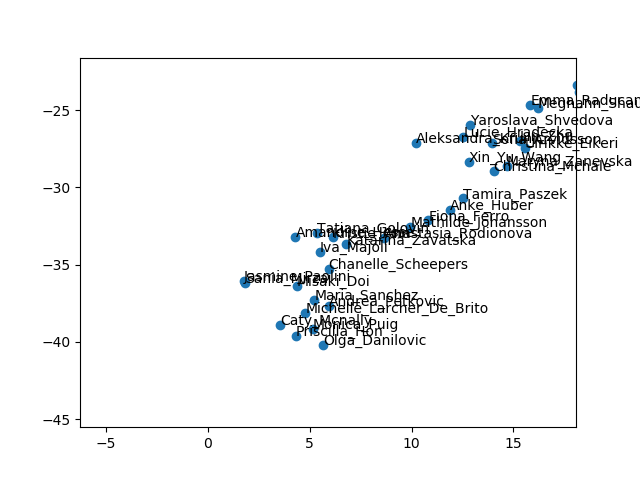

In [62]:
# plot
#print(data)
x = data[:,0]
y = data[:,1]
fig, ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

#fig.set_size_inches(22,16)

sources:
<br>
https://stackoverflow.com/questions/13078751/combine-duplicated-columns-within-a-dataframe
<br>
https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
<br>